### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

### Data Loading

In [4]:
df=pd.read_csv("input/traffic.csv", parse_dates=True, index_col='DateTime')

In [5]:
df.shape

(48120, 3)

In [6]:
df.isnull().sum()

Junction    0
Vehicles    0
ID          0
dtype: int64

In [7]:
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [8]:
df.drop(labels=["ID"],axis=1,inplace=True)

In [9]:
print("Mean value for given features:",round(df["Vehicles"].mean()))

Mean value for given features: 23


In [10]:
print("Median value for given features:",round(df["Vehicles"].median()))

Median value for given features: 15


In [11]:
print("Standard deviation value for given features:",round(df["Vehicles"].std()))

Standard deviation value for given features: 21


In [12]:
mode_val=df["Vehicles"].mode()
print("Mode value for given features:",mode_val[0])

Mode value for given features: 8


In [13]:
print("Variance value for given features:",round(df["Vehicles"].var()))

Variance value for given features: 431


In [14]:
df.head()

,Junction,Vehicles
DateTime,,
2015-11-01 00:00:00,1,15
2015-11-01 01:00:00,1,13
2015-11-01 02:00:00,1,10
2015-11-01 03:00:00,1,7
2015-11-01 04:00:00,1,9


### Visualization

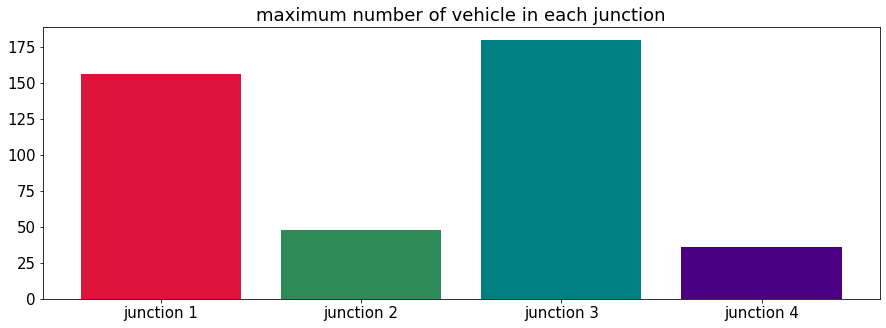

In [15]:
plt.figure(figsize=(15,5))
plt.rcParams["font.size"]=15
bar_data=[df.loc[df["Junction"]==1]["Vehicles"].max(),df.loc[df["Junction"]==2]["Vehicles"].max(),df.loc[df["Junction"]==3]["Vehicles"].max(),df.loc[df["Junction"]==4]["Vehicles"].max()]
colors=["crimson","seagreen","teal","indigo"]
plt.bar(x=["junction 1","junction 2","junction 3","junction 4"],height=bar_data,color=colors)
plt.title(label="maximum number of vehicle in each junction")
plt.show()

In [16]:
# extract year from date
df['Year'] = pd.Series(df.index).apply(lambda x: x.year).to_list()

# extract month from date
df['Month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# extract day from date
df['Day'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# extract hour from date
df['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()

In [17]:
df["Hour"]=df["Hour"]*5
df["minutes"]=df["Hour"]
df=df.drop(labels="Hour",axis=1)

In [18]:
df=df.reset_index(drop=True)
df.head()

,Junction,Vehicles,Year,Month,Day,minutes
0,1,15,2015,11,1,0
1,1,13,2015,11,1,5
2,1,10,2015,11,1,10
3,1,7,2015,11,1,15
4,1,9,2015,11,1,20


In [19]:
df["Year"].unique()

array([2015, 2016, 2017], dtype=int64)

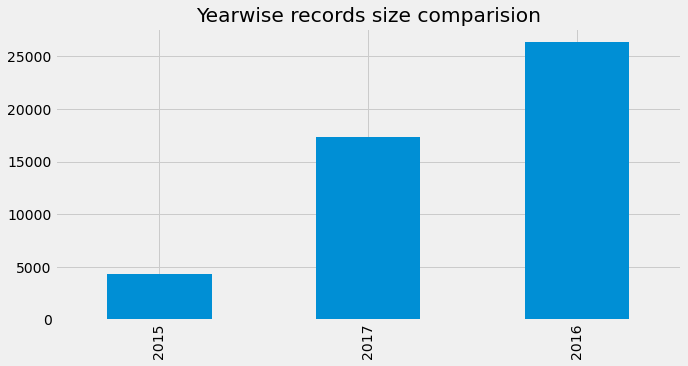

In [20]:
with plt.style.context("fivethirtyeight"):
    ax=df["Year"].value_counts(ascending=True).plot.bar(figsize=(10,5))
    plt.title(label="Yearwise records size comparision")
    plt.show()

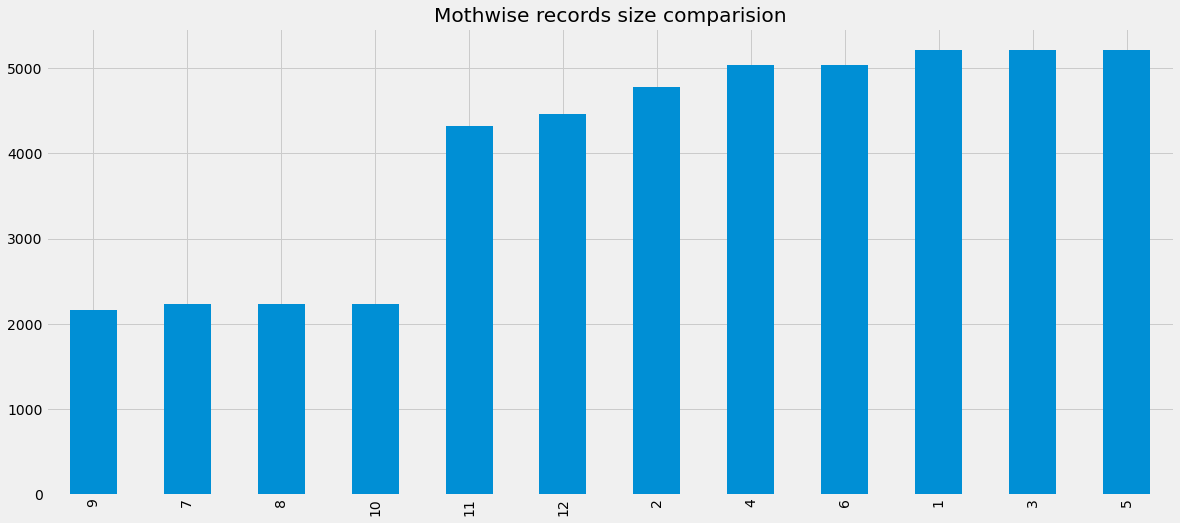

In [21]:
with plt.style.context("fivethirtyeight"):
    ax=df["Month"].value_counts(ascending=True).plot.bar(figsize=(18,8))
    plt.title("Mothwise records size comparision")
    plt.show()

### Seperating Independent and dependent features

In [22]:
X=df.drop(labels="Vehicles",axis=1)
y=df["Vehicles"]

In [23]:
X_test=X[38496:]
y_test=y[38496:]

## Algorithm - 1:RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model.fit(X,y)

RandomForestRegressor()

In [25]:
RF_predictions=RF_model.predict(X_test)

In [26]:
print(RF_predictions)

[15.52 12.05 10.28 ... 17.46 19.9  14.72]


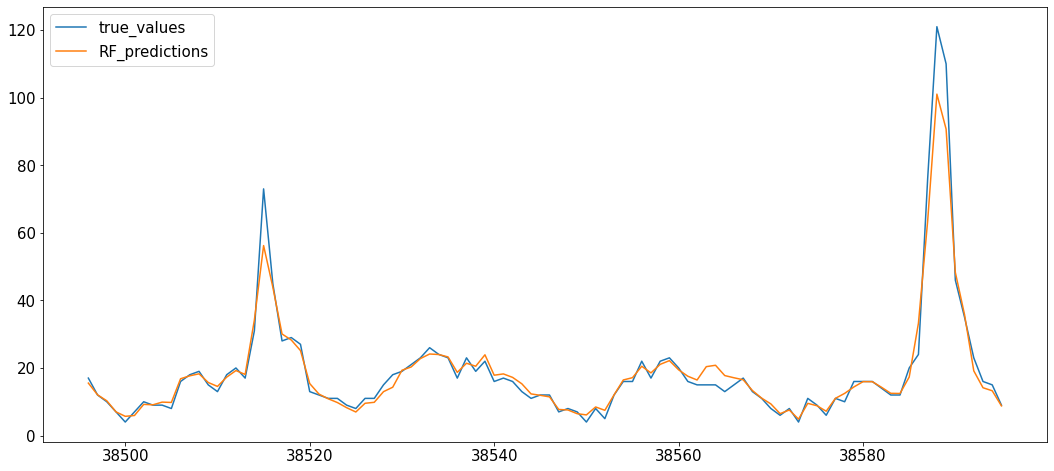

In [27]:
result=pd.DataFrame()
result["true_values"]=y_test
result["RF_predictions"]=RF_predictions
result.head(100).plot(figsize=(18,8))
plt.show()

### Result Analysis

In [28]:
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
print("MSE loss value is:",mean_squared_error(y_true=y_test,y_pred=RF_predictions))

MSE loss value is: 2.977929135494597


In [30]:
print("R2 Score loss value is:",r2_score(y_true=y_test,y_pred=RF_predictions))

R2 Score loss value is: 0.9700243609249657


In [31]:
import pickle
with open(file="models/RandomForestRegressor_model.pkl",mode="wb") as file:
    pickle.dump(obj=RF_model,file=file)

## Algorithm - 2: SupportVectorRegressor

In [32]:
from sklearn.svm import SVR
SVR_model=SVR()
SVR_model.fit(X,y)

SVR()

In [33]:
SVR_predictions=SVR_model.predict(X_test)

In [34]:
print(SVR_predictions)

[11.51158039 11.82427142 12.13712433 ... 18.13169587 18.44467637
 18.75750887]


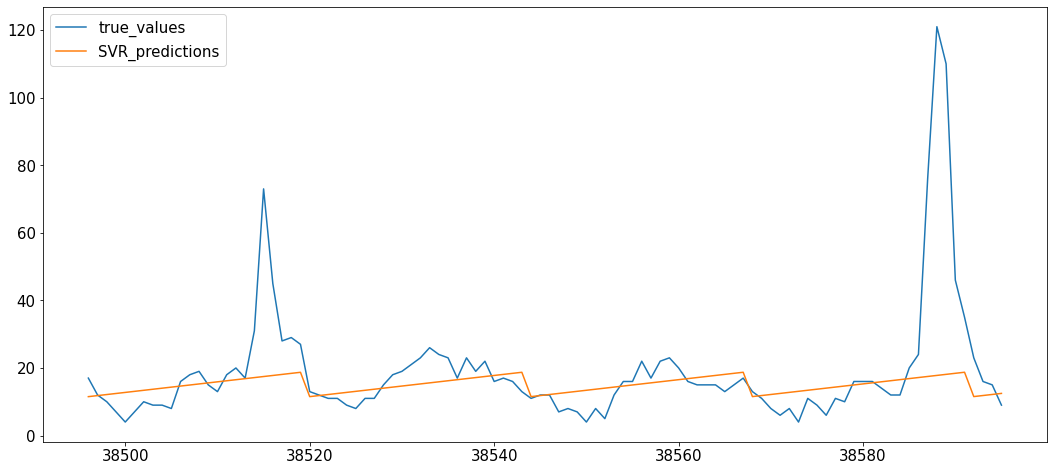

In [35]:
result["SVR_predictions"]=SVR_predictions
result_svr=result[["true_values","SVR_predictions"]]
result_svr.head(100).plot(figsize=(18,8))
plt.show()

### Result Analysis

In [36]:
print("MSE loss value is:",mean_squared_error(y_true=y_test,y_pred=SVR_predictions))

MSE loss value is: 94.86360913092523


In [37]:
print("R2 Score loss value is:",r2_score(y_true=y_test,y_pred=SVR_predictions))

R2 Score loss value is: 0.04510914152715184


In [38]:
import pickle
with open(file="models/SupportVectorRegressor_model.pkl",mode="wb") as file:
    pickle.dump(obj=SVR_model,file=file)

## Algorithm - 3: LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(X,y)

LinearRegression()

In [40]:
LR_predictions=LR_model.predict(X_test)

In [41]:
print(LR_predictions)

[ 4.88193261  5.54121462  6.20049663 ... 15.20800547 15.86728748
 16.52656949]


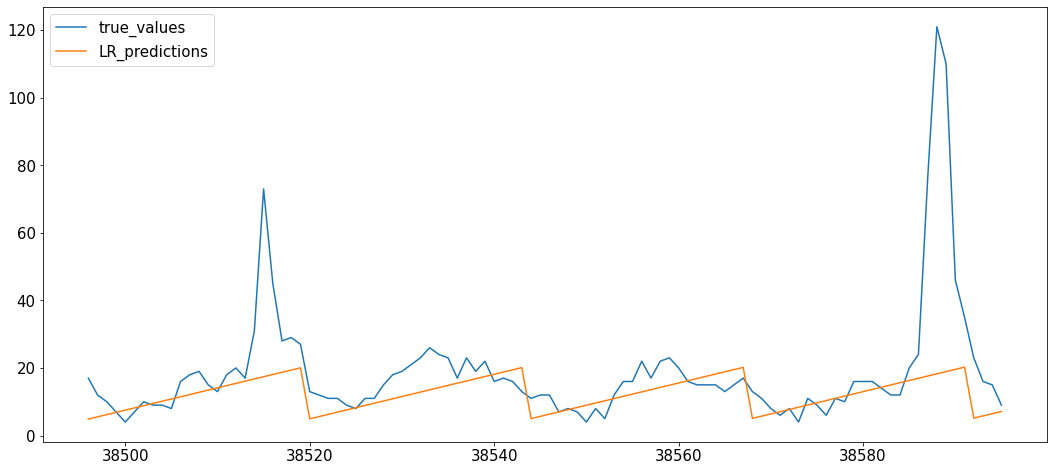

In [42]:
result["LR_predictions"]=LR_predictions
result_lr=result[["true_values","LR_predictions"]]
result_lr.head(100).plot(figsize=(18,8))
plt.show()

### Result Analysis

In [43]:
print("MSE loss value is:",mean_squared_error(y_true=y_test,y_pred=LR_predictions))

MSE loss value is: 73.43047307276002


In [44]:
print("R2 Score loss value is:",r2_score(y_true=y_test,y_pred=LR_predictions))

R2 Score loss value is: 0.2608536812705252


In [45]:
import pickle
with open(file="models/LinearRegresson_model.pkl",mode="wb") as file:
    pickle.dump(obj=LR_model,file=file)

### Result Comparision

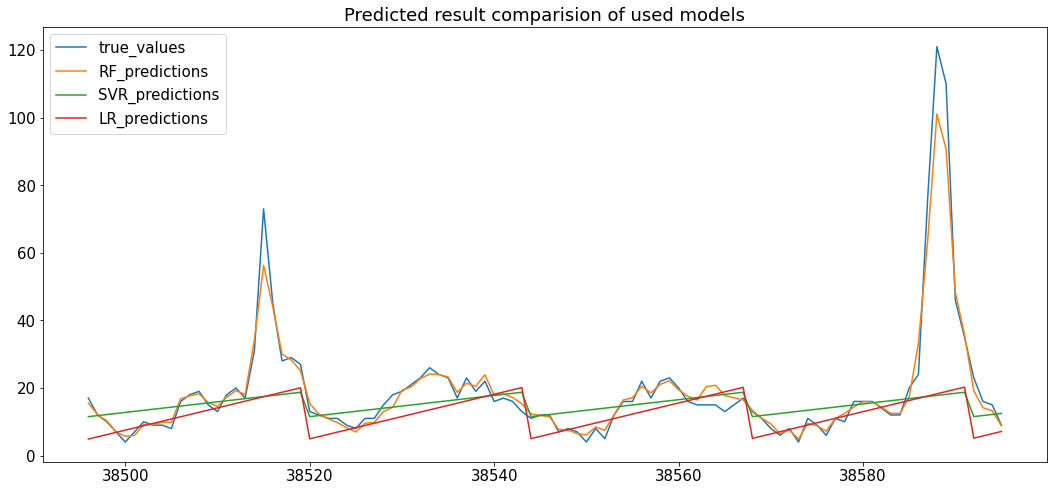

In [46]:
result.head(100).plot(figsize=(18,8))
plt.title(label="Predicted result comparision of used models")
plt.show()

# Thank You